In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("test.csv")
df.head()

,Unnamed: 0,Name,RA2000,DE2000,E(B-V),(B-V)0,log(Age),ApDiam,N2,Nbs,r_Name,Note
0,0,Blanco 1,00 04.3,-29 56,0,-0.15,7.70,70,10,1,87,NaN
1,1,NGC 103,00 25.2,+61 20,0.46,-0.1,7.58,5,7,0,143,NaN
2,2,NGC 129,00 29.9,+60 13,0.57,-0.2,8.18,12,25,3,165,NaN
3,3,NGC 136,00 31.5,+61 31,0.56,-0.05,8.30,1.5,10,0,143,NaN
4,4,King 14,00 31.8,+63 09,0.47,-0.2,7.20,7,10,0,143,NaN


In [3]:
df.shape

(399, 12)

In [4]:
df.head()

,Unnamed: 0,Name,RA2000,DE2000,E(B-V),(B-V)0,log(Age),ApDiam,N2,Nbs,r_Name,Note
0,0,Blanco 1,00 04.3,-29 56,0,-0.15,7.70,70,10,1,87,NaN
1,1,NGC 103,00 25.2,+61 20,0.46,-0.1,7.58,5,7,0,143,NaN
2,2,NGC 129,00 29.9,+60 13,0.57,-0.2,8.18,12,25,3,165,NaN
3,3,NGC 136,00 31.5,+61 31,0.56,-0.05,8.30,1.5,10,0,143,NaN
4,4,King 14,00 31.8,+63 09,0.47,-0.2,7.20,7,10,0,143,NaN


In [5]:
df.tail()

,Unnamed: 0,Name,RA2000,DE2000,E(B-V),(B-V)0,log(Age),ApDiam,N2,Nbs,r_Name,Note
394,394,NGC 7762,23 49.8,+68 01,1.02,0.15,8.90,15,6,0,47,NaN
395,395,King 12,23 53.0,+61 57,0.6,-0.26,7.00,3,3,0,256,*
396,396,NGC 7788,23 56.7,+61 23,0.28,-0.15,7.20,4,10,1,26,NaN
397,397,NGC 7789,23 57.0,+56 43,0.26,0.35,9.20,25,130,25,38,*
398,398,NGC 7790,23 58.4,+61 12,0.52,-0.2,7.25,5.4,18,2,286,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  399 non-null    int64  
 1   Name        399 non-null    object 
 2   RA2000      399 non-null    object 
 3   DE2000      399 non-null    object 
 4   E(B-V)      399 non-null    object 
 5   (B-V)0      399 non-null    object 
 6   log(Age)    399 non-null    float64
 7   ApDiam      399 non-null    object 
 8   N2          399 non-null    int64  
 9   Nbs         399 non-null    int64  
 10  r_Name      399 non-null    object 
 11  Note        104 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 37.5+ KB


In [7]:
df.describe()

,Unnamed: 0,log(Age),N2,Nbs
count,399.000000,399.000000,399.000000,399.000000
mean,199.000000,7.798622,27.819549,2.448622
std,115.325626,0.925926,38.325733,5.451637
min,0.000000,6.000000,2.000000,0.000000
25%,99.500000,7.200000,10.000000,0.000000
50%,199.000000,7.800000,15.000000,1.000000
75%,298.500000,8.475000,30.000000,2.000000
max,398.000000,9.900000,270.000000,46.000000


In [8]:
df.isnull().sum()

Unnamed: 0      0
Name            0
RA2000          0
DE2000          0
E(B-V)          0
(B-V)0          0
log(Age)        0
ApDiam          0
N2              0
Nbs             0
r_Name          0
Note          295
dtype: int64

In [9]:
df = df.drop('Name',axis = 1)
df = df.drop('Note',axis = 1)
df = df.drop('RA2000',axis = 1)
df = df.drop('DE2000',axis = 1)
df = df.drop('Unnamed: 0',axis = 1)
df = df.drop('r_Name',axis = 1)

In [10]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df.dropna(inplace=True)

In [11]:
df = df.apply(lambda x: x.str.replace(',', '') if x.dtype == "object" else x)
df = df.astype(float)

In [12]:
df.head(10)

,E(B-V),(B-V)0,log(Age),ApDiam,N2,Nbs
0,0.00,-0.15,7.70,70.0,10.0,1.0
1,0.46,-0.10,7.58,5.0,7.0,0.0
2,0.57,-0.20,8.18,12.0,25.0,3.0
3,0.56,-0.05,8.30,1.5,10.0,0.0
4,0.47,-0.20,7.20,7.0,10.0,0.0
5,0.58,-0.20,7.10,5.0,15.0,1.0
6,0.51,-0.22,7.30,5.0,20.0,0.0
7,0.50,-0.27,6.40,5.0,10.0,0.0
8,0.29,-0.10,8.15,15.0,10.0,0.0
9,0.05,0.58,9.70,15.0,170.0,20.0


In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=99)

In [15]:
X_train.shape

(296, 5)

In [16]:
y_train.shape

(296,)

In [17]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(criterion = 'squared_error',
                           max_depth = 10,
                           min_samples_split = 10,
                           random_state = 5)

In [18]:
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=5)

In [19]:
y_pred = reg.predict(X_test)

In [20]:
y_pred

array([ 0.33333333,  0.25      ,  0.        ,  0.        ,  2.        ,
        0.        ,  1.        ,  0.33333333,  0.25      ,  0.33333333,
        1.        ,  0.625     , 27.88888889,  0.        ,  8.75      ,
        4.        ,  2.        ,  0.33333333,  1.71428571,  0.16666667,
        4.75      ,  0.33333333,  1.        ,  0.        ,  1.33333333,
       27.88888889,  1.        ,  0.33333333,  0.        ,  0.875     ,
        0.25      ,  0.        ,  1.33333333,  3.        ,  1.        ,
        0.        , 18.66666667,  1.        ,  0.5       ,  0.        ,
        1.5       ,  0.625     ,  0.25      ,  0.33333333,  0.        ,
        0.        ,  1.        , 18.66666667,  1.        ,  4.        ,
        0.33333333,  1.        ,  3.        ,  0.        ,  3.        ,
        0.        ,  6.6       ,  0.        ,  2.        ,  1.        ,
        1.33333333,  0.33333333,  3.        ,  1.71428571,  0.33333333,
        0.        ,  0.        ,  0.        ,  0.16666667,  0.25

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

7.5312065477144845

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.7443043832116154

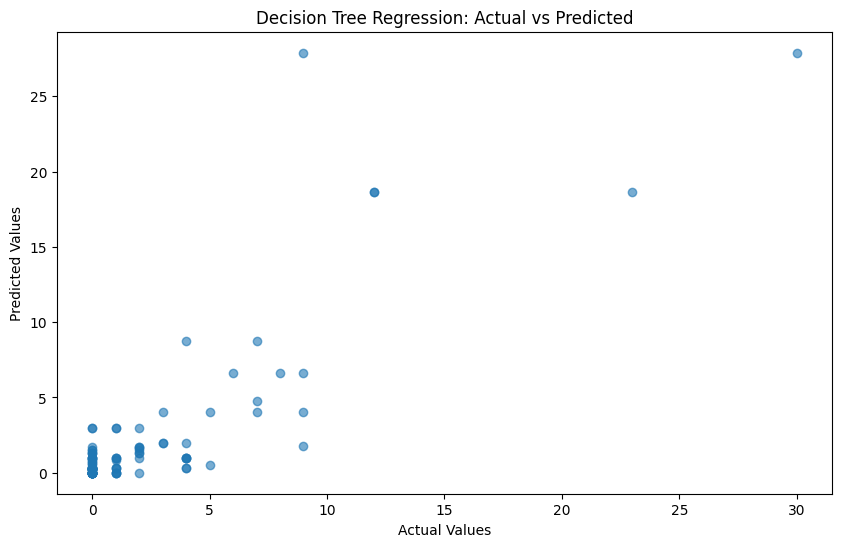

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs Predicted")
plt.show()

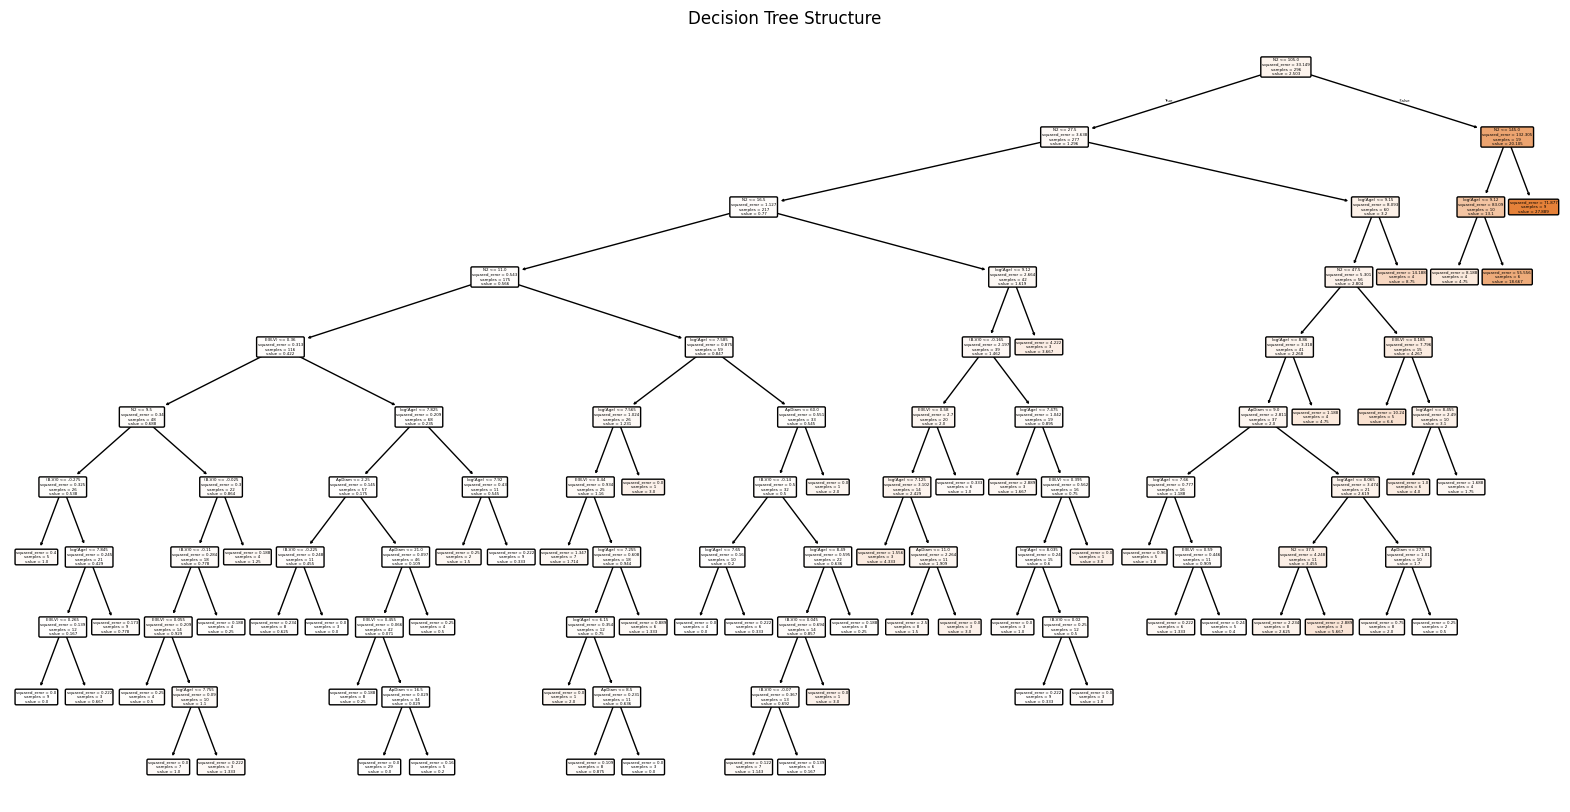

In [25]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(20, 10))
plot_tree(reg, filled=True, feature_names=X.columns, rounded=True)
plt.title("Decision Tree Structure")
plt.show()